In [13]:
from __future__ import absolute_import, division, \
    print_function, unicode_literals

In [14]:
! cd /content/

In [15]:
! ls

dbn.py	__pycache__  rbm.py  sample_data


In [16]:
from dbn import DBN

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow.compat.v2 as tf
import tensorflow_datasets as tfds

In [20]:
def flatten_image(x, label=False):
    if label:
        return (tf.divide(tf.dtypes.cast(tf.reshape(x["image"], (1,28*28)), tf.float32), 256.0) , x["label"])
    else:
        return (tf.divide(tf.dtypes.cast(tf.reshape(x["image"], (1,28*28)), tf.float32), 256.0))

In [21]:
mnist_builder = tfds.builder("mnist")
mnist_builder.download_and_prepare()

mnist_train = mnist_builder.as_dataset(split="train")

rbm_params = [
    {"number_hidden_units": 500, "number_visible_units": 784},
    {"number_hidden_units": 500, "number_visible_units": 500},
    {"number_hidden_units": 2000, "number_visible_units": 500},
    {"number_hidden_units": 10, "number_visible_units": 2000}
]

deep_belief_network = DBN(rbm_params, tolerance=1)

# pre-training and wake-sleep
deep_belief_network.train_dbn(mnist_train.map(lambda x: flatten_image(x, label=False)))

# backprop
deep_belief_network.compile(loss=tf.keras.losses.CategoricalCrossentropy())
deep_belief_network.fit(  x=mnist_train.map(
            lambda x: flatten_image(x, label=True)).batch(1000), )


epoch: 0, cost: -0.2543654327948888
epoch: 1, cost: -0.23724324598312377
epoch: 0, cost: -0.6739839207649231
epoch: 1, cost: -0.6736218537966411
epoch: 0, cost: -0.5591242031733195
epoch: 1, cost: -0.5558829942385356
epoch: 0, cost: -0.6521224404017131
epoch: 1, cost: -0.6514506204605103
epoch: 0, wake_cost: -inf
epoch: 0, wake_cost: nan
epoch: 0, wake_cost: -0.5648753291447958


TypeError: DBN.train_rbm() got an unexpected keyword argument 'num_epochs'

In [ ]:
# Print the structure of dataset items
for item in mnist_train.take(1):
    print(item)

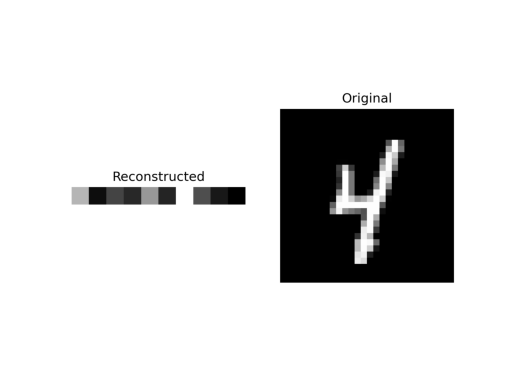

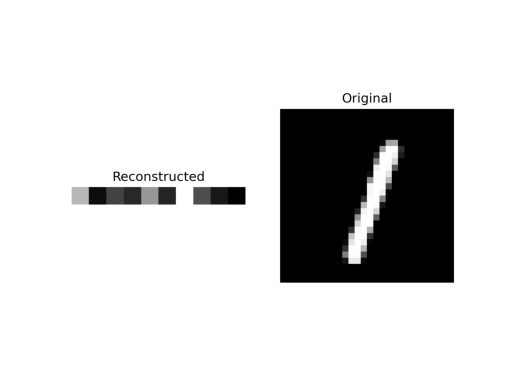

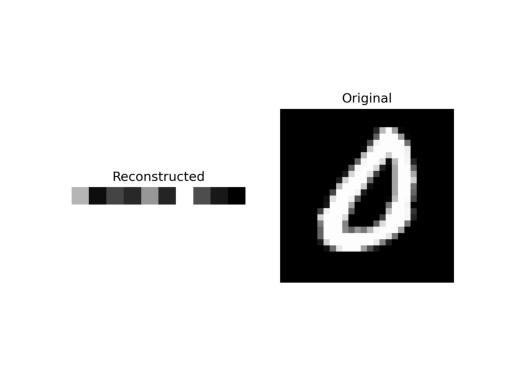

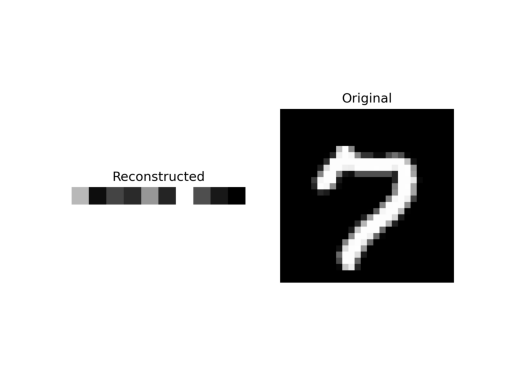

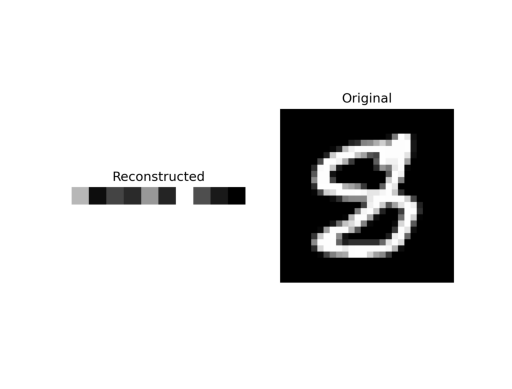

In [43]:
i = 1  # Start with subplot index 1

for image in mnist_train.map(flatten_image).batch(1).take(5):  # Adjust the number of images to display

    plt.figure()  # Create a new figure for each iteration

    plt.subplot(1, 2, 1)  # First subplot
    reconstructed_image = deep_belief_network(image.numpy())

    plt.imshow(tf.reshape(reconstructed_image, (1, 10)).numpy().astype(np.float32), cmap=plt.get_cmap("gray"))

    plt.title('Reconstructed')
    plt.axis('off')  # Turn off axis labels

    plt.subplot(1, 2, 2)  # Second subplot
    original_image = image.numpy()
    plt.imshow(original_image.reshape(28, 28).astype(np.float32), cmap=plt.get_cmap("gray"))
    plt.title('Original')
    plt.axis('off')  # Turn off axis labels

    plt.savefig(f'output/figure_{i}.png', dpi=300)  # Save the current figure
    plt.close()  # Close the figure to avoid displaying it immediately
    i += 1

# Display the saved figures
for j in range(1, i):
    img = plt.imread(f'output/figure_{j}.png')
    plt.imshow(img)
    plt.axis('off')  # Turn off axis labels
    plt.show()